In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'svg'

In [2]:
dataset= pd.read_csv('PP_Mtrls_and_their_Mchncl_Prprts.csv')
dataset

Material    Su    Sy       E      G   mu    Ro  \
0      ANSI Steel SAE 1015 asrolled   421   314  207000  79000  0.3  7860   
1    ANSI Steel SAE 1015 normalized   424   324  207000  79000  0.3  7860   
2      ANSI Steel SAE 1015 annealed   386   284  207000  79000  0.3  7860   
3      ANSI Steel SAE 1020 asrolled   448   331  207000  79000  0.3  7860   
4    ANSI Steel SAE 1020 normalized   441   346  207000  79000  0.3  7860   
..                              ...   ...   ...     ...    ...  ...   ...   
797           NF NF 30CD12 nitrided   980   770  206000  80000  0.3  7860   
798        NF NF 16NC6 casehardened  1100   800  206000  80000  0.3  7860   
799       NF NF 18NCD6 casehardened  1200   850  206000  80000  0.3  7860   
800       NF NF 30CND8 heat treated  1030   850  206000  80000  0.3  7860   
801       JIS JIS SUP9 heat treated  1226  1069  206000  80000  0.3  7860   

       Use  
0     True  
1     True  
2     True  
3     True  
4     True  
..     ...  
797  False  
798  False  
799  False  
800  False  
801  False  

[802 rows x 8 columns]

In [3]:
dataset.shape

(802, 8)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Material  802 non-null    object 
 1   Su        802 non-null    int64  
 2   Sy        802 non-null    int64  
 3   E         802 non-null    int64  
 4   G         802 non-null    int64  
 5   mu        802 non-null    float64
 6   Ro        802 non-null    int64  
 7   Use       802 non-null    bool   
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 44.8+ KB


In [5]:
# Changing Data Type of the Use coloumn
dataset['Use'] = dataset['Use'].astype('object')

In [6]:
dataset.describe()

Su           Sy              E              G          mu  \
count   802.000000   802.000000     802.000000     802.000000  802.000000   
mean    621.024938   422.502494  159251.870324   66125.935162    0.309027   
std     366.460503   281.727550   63107.176755   35225.903400    0.015660   
min      69.000000    28.000000   73000.000000   26000.000000    0.290000   
25%     310.000000   214.000000   73000.000000   26000.000000    0.300000   
50%     574.500000   345.500000  204000.000000   79000.000000    0.300000   
75%     800.000000   556.000000  206000.000000   80000.000000    0.330000   
max    1535.000000  1069.000000  219000.000000  161000.000000    0.330000   

                Ro  
count   802.000000  
mean   6045.145885  
std    2521.218412  
min    1750.000000  
25%    2700.000000  
50%    7850.000000  
75%    7860.000000  
max    8800.000000

# Checking for Null records

In [7]:
dataset.isnull().sum()

Material    0
Su          0
Sy          0
E           0
G           0
mu          0
Ro          0
Use         0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Material  802 non-null    object 
 1   Su        802 non-null    int64  
 2   Sy        802 non-null    int64  
 3   E         802 non-null    int64  
 4   G         802 non-null    int64  
 5   mu        802 non-null    float64
 6   Ro        802 non-null    int64  
 7   Use       802 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 50.3+ KB


# Performing Exploratory Data Analysis

### Q1) Find top 10 materials used for structural components of buildings & bridges.


### Solution: Materials with high Su, Sy & E are used in structural components of buildings & bridges.

In [9]:
# Calculate the 90th percentile for Su and Sy values
su_percentile = dataset['Su'].quantile(0.90) 
sy_percentile = dataset['Sy'].quantile(0.90)
e_percentile = dataset['E'].quantile(0.90)

# Filter materials with Su and Sy values in the top 10% (highest) of the dataset
high_su_materials = dataset[dataset['Su'] >= su_percentile]
high_sy_materials = dataset[dataset['Sy'] >= sy_percentile]
high_e_materials = dataset[dataset['E'] >= e_percentile]

# Combine the materials with high Su and high Sy into one DataFrame (if needed)
high_su_sy_and_e_materials = pd.concat([high_su_materials, high_sy_materials,high_e_materials])

# Sort the high_su_and_sy_materials DataFrame by 'Su' in descending order
sorted_materials = high_su_sy_and_e_materials.sort_values(by='Su', ascending=False)

# Get the top 10 materials
top_10_materials = sorted_materials.head(10)
top_10_materials

Material    Su    Sy       E  \
649  GOST Steel 40ChFA GOST 454371 Quenching and co...  1535  1069  215000   
71               ANSI Steel SAE 4340 tempered at 400 F  1535  1069  207000   
99               ANSI Steel SAE 8660 tempered at 800 F  1535  1069  207000   
71               ANSI Steel SAE 4340 tempered at 400 F  1535  1069  207000   
102              ANSI Steel SAE 8740 tempered at 400 F  1535  1069  207000   
105              ANSI Steel SAE 9255 tempered at 400 F  1535  1069  207000   
76               ANSI Steel SAE 5046 tempered at 400 F  1535  1069  207000   
649  GOST Steel 40ChFA GOST 454371 Quenching and co...  1535  1069  215000   
106              ANSI Steel SAE 9260 tempered at 800 F  1535  1069  207000   
77               ANSI Steel SAE 5130 tempered at 400 F  1535  1069  207000   

         G   mu    Ro    Use  
649  83000  0.3  7810  False  
71   79000  0.3  7860  False  
99   79000  0.3  7860  False  
71   79000  0.3  7860  False  
102  79000  0.3  7860  False  
105  79000  0.3  7860  False  
76   79000  0.3  7860  False  
649  83000  0.3  7810  False  
106  79000  0.3  7860  False  
77   79000  0.3  7860  False

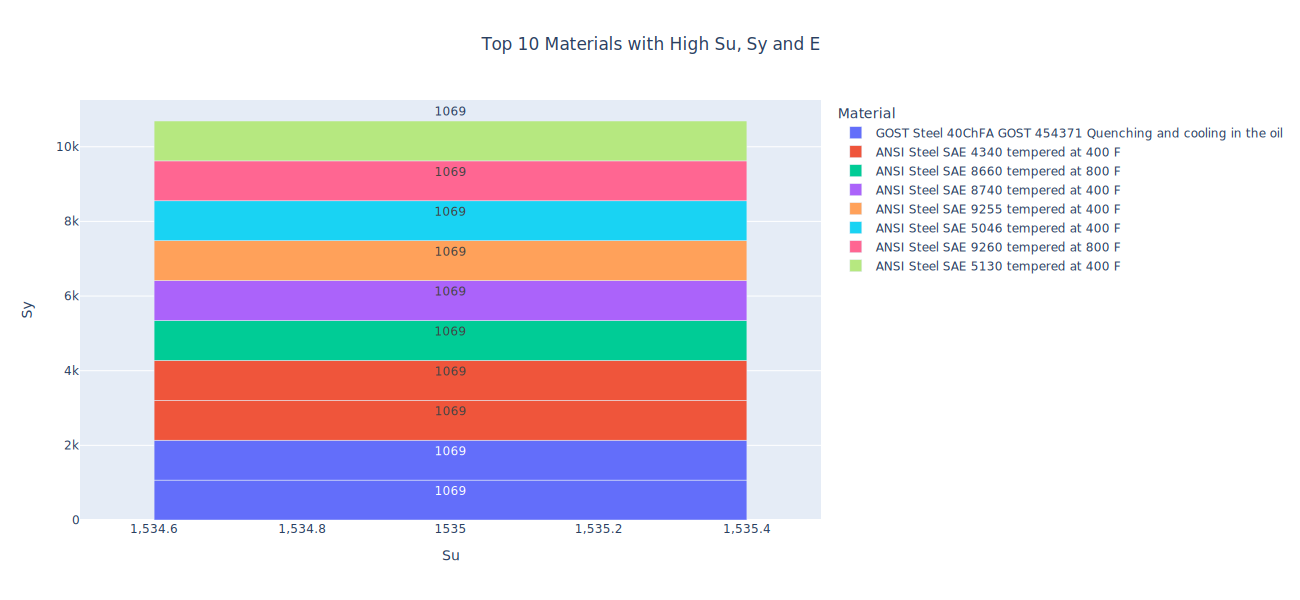

In [10]:

# Create a bar chart
fig = px.bar(top_10_materials, x='Su', y='Sy', title='Top 10 Materials with High Su, Sy and E', color='Material', text='Sy')

#Customize the text display on the bars
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=1300, 
    height=600, title_x=0.5
)

fig.show()

### Q2) What is the Avg Su of materials with high Sy & E ?

In [11]:
avrg_su=sorted_materials.groupby(by=['Sy','E'])['Su'].mean().reset_index()

avrg_su.columns = ['Sy','E','Mean Su']
avrg_su


# Merge 'avrg_su' with 'sorted_materials' on the common columns ('Sy' and 'E')
#avrg_su_with_material = avrg_su.merge(sorted_materials[['Material','Sy', 'E']], on=['Sy', 'E'], how='left')

# Sort the DataFrame in descending order by 'Mean Su'
#avrg_su_with_material_sorted = avrg_su_with_material.sort_values(by='Mean Su', ascending=False)
#avrg_su_with_material_sorted

Sy       E      Mean Su
0     240  212000   390.000000
1     245  212000   410.000000
2     245  215000   441.000000
3     255  210000   471.000000
4     275  212000   491.000000
..    ...     ...          ...
136  1069  206000  1401.040000
137  1069  207000  1533.333333
138  1069  213000  1428.333333
139  1069  214000  1300.000000
140  1069  215000  1511.666667

[141 rows x 3 columns]

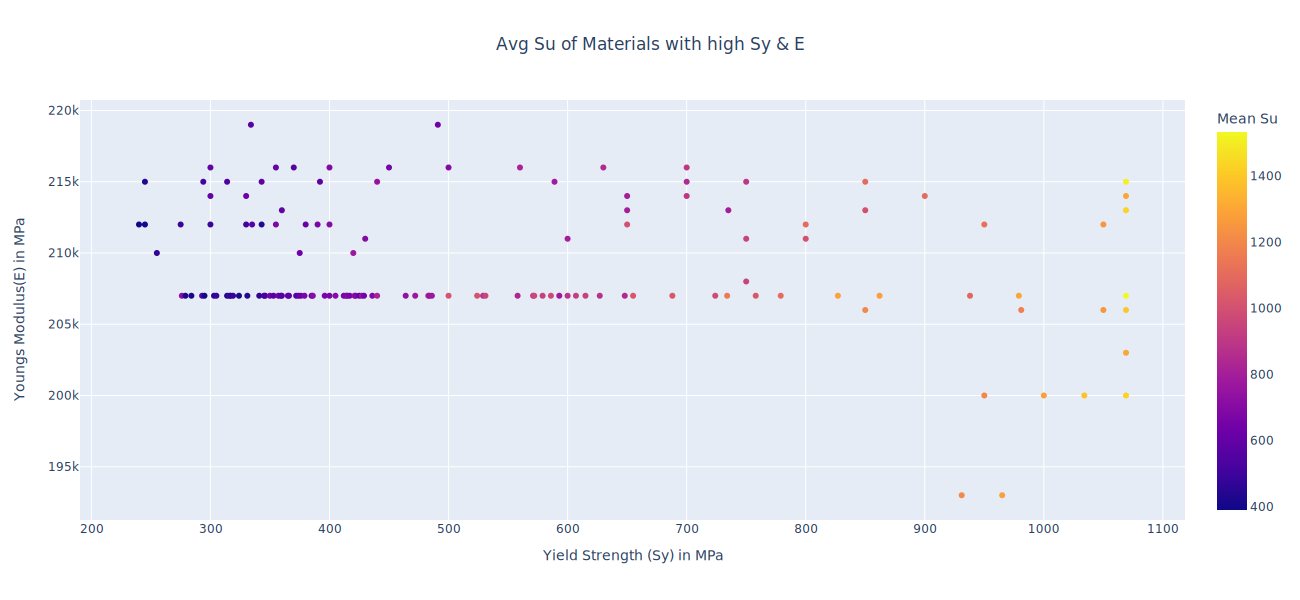

In [12]:
# Create a scatter plot using Plotly

fig = px.scatter(avrg_su, x='Sy', y='E', title=' Avg Su of Materials with high Sy & E ', color='Mean Su')

# Customize the appearance of the plot
fig.update_layout(xaxis_title= 'Yield Strength (Sy) in MPa', yaxis_title='Youngs Modulus(E) in MPa')
fig.update_layout(
    autosize=False,
    width=1300, 
    height=600, title_x=0.5
)
fig.show()

### Q3) Find the materials suitable for biomechanics(Orthopaedic Implants).

### Solution : The elastic modulus (E) of human bone typically falls in the range of 14,000 to 20,000 megapascals (MPa)

### The density (Ro) of human bone also varies but is generally in the range of 1800 to 2,100 kg/m³.


### Should Check for the materials satisfying these 2 criteria

In [13]:
# Check for values in 'Column1' in the range of 14,000 to 20,000
filtered_values_E = dataset[(dataset['E'] == 14000) & (dataset['E'] < 20001)]
print(filtered_values_E)

Empty DataFrame
Columns: [Material, Su, Sy, E, G, mu, Ro, Use]
Index: []


In [14]:
# Check for values in 'Column2' in the range of 1,800 to 2,100
filtered_values_Ro = dataset[(dataset['Ro'] == 1800) & (dataset['Ro'] < 2101)]
print(filtered_values_Ro)

Empty DataFrame
Columns: [Material, Su, Sy, E, G, mu, Ro, Use]
Index: []


### Inference : No materials are suitable for biomechanics(Orthopaedic Implants).

### Q4) List the material which does not change in lateral dimensions when stretched or compressed.


### Solution: For a material which does not undergo change in lateral dimensions when stretched or compressed its Poisson's ratio (mu) has to be 0

In [15]:
filtered_values_mu = dataset[(dataset['mu'] == 0.0)]
print(filtered_values_mu)

Empty DataFrame
Columns: [Material, Su, Sy, E, G, mu, Ro, Use]
Index: []


### Inference : No such materials are present in the given dataset.

### Q5)  Find the more efficient materials which are weight-saving and exhibiting high stiffness.

### Solution: Materials with higher specific stiffness are often preferred when weight-saving and stiffness are crucial, such as in aerospace applications where Specific Stiffness (SS) = Shear Modulus (G) / Density (Ro).

In [16]:
dataset['SS'] = dataset['G'] / dataset['Ro']
table = dataset[['Material', 'G', 'Ro', 'SS']]

# Sort the table by Specific Stiffness in descending order
table_sorted = table.sort_values(by='SS', ascending=False)

# Get the top 10 materials
top_10_materials = table_sorted.head(10)
table.head(10)

Material      G    Ro         SS
0    ANSI Steel SAE 1015 asrolled  79000  7860  10.050891
1  ANSI Steel SAE 1015 normalized  79000  7860  10.050891
2    ANSI Steel SAE 1015 annealed  79000  7860  10.050891
3    ANSI Steel SAE 1020 asrolled  79000  7860  10.050891
4  ANSI Steel SAE 1020 normalized  79000  7860  10.050891
5    ANSI Steel SAE 1020 annealed  79000  7860  10.050891
6    ANSI Steel SAE 1022 asrolled  79000  7860  10.050891
7  ANSI Steel SAE 1022 normalized  79000  7860  10.050891
8    ANSI Steel SAE 1022 annealed  79000  7860  10.050891
9    ANSI Steel SAE 1030 asrolled  79000  7860  10.050891

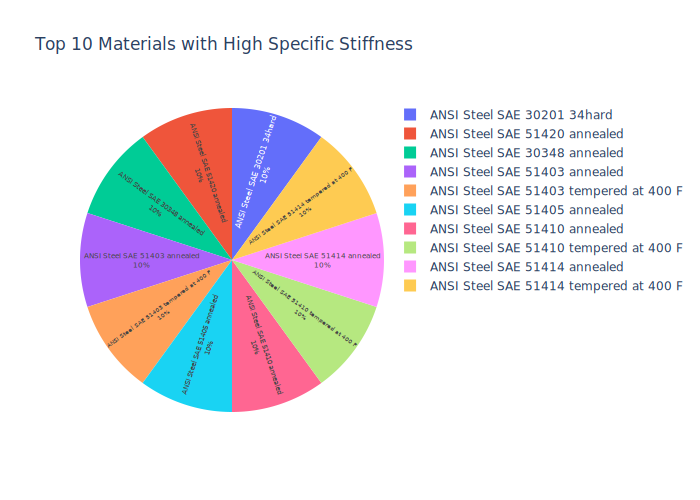

In [17]:
fig=px.pie(top_10_materials, names = 'Material', values = 'SS', color = 'Material',
          title= 'Top 10 Materials with High Specific Stiffness').update_traces(textposition='inside',textinfo='percent+label')
fig.show()

### Q6) What is the safety margin, ensuring that materials do not reach their breaking point in practical applications ?

### Solution : In many cases, Su is higher than Sy, which is common for most engineering materials. This difference between Su and Sy provides a safety margin, ensuring that materials do not reach their breaking point in practical applications.

In [18]:
dataset['Su - Sy'] = dataset['Su'] - dataset['Sy']
table = dataset[['Material', 'Su', 'Sy', 'Su - Sy']]

# Sort the table by Su-Sy in descending order
table_sorted = table.sort_values(by='Su - Sy', ascending=False)


# Get the top 20 materials
top_20_materials = table_sorted.head(20)
top_20_materials


Material    Su    Sy  Su - Sy
30                      ANSI Steel SAE 1095 normalized  1014   500      514
26                      ANSI Steel SAE 1080 normalized  1010   524      486
116                      ANSI Steel SAE 30301 annealed   758   276      482
60               ANSI Steel SAE 4130 tempered at 400 F  1535  1069      466
469                        DIN DIN 37Cr4 nitrocasehard  1535  1069      466
95               ANSI Steel SAE 8640 tempered at 400 F  1535  1069      466
94               ANSI Steel SAE 8630 tempered at 400 F  1535  1069      466
53               ANSI Steel SAE 1340 tempered at 400 F  1535  1069      466
649  GOST Steel 40ChFA GOST 454371 Quenching and co...  1535  1069      466
89               ANSI Steel SAE 6150 tempered at 400 F  1535  1069      466
86               ANSI Steel SAE 5160 tempered at 400 F  1535  1069      466
57               ANSI Steel SAE 4042 tempered at 400 F  1535  1069      466
83               ANSI Steel SAE 5150 tempered at 400 F  1535  1069      466
63               ANSI Steel SAE 4140 tempered at 400 F  1535  1069      466
99               ANSI Steel SAE 8660 tempered at 800 F  1535  1069      466
80               ANSI Steel SAE 5140 tempered at 400 F  1535  1069      466
77               ANSI Steel SAE 5130 tempered at 400 F  1535  1069      466
154            ANSI Steel SAE 51440A tempered at 600 F  1535  1069      466
71               ANSI Steel SAE 4340 tempered at 400 F  1535  1069      466
66               ANSI Steel SAE 4150 tempered at 400 F  1535  1069      466

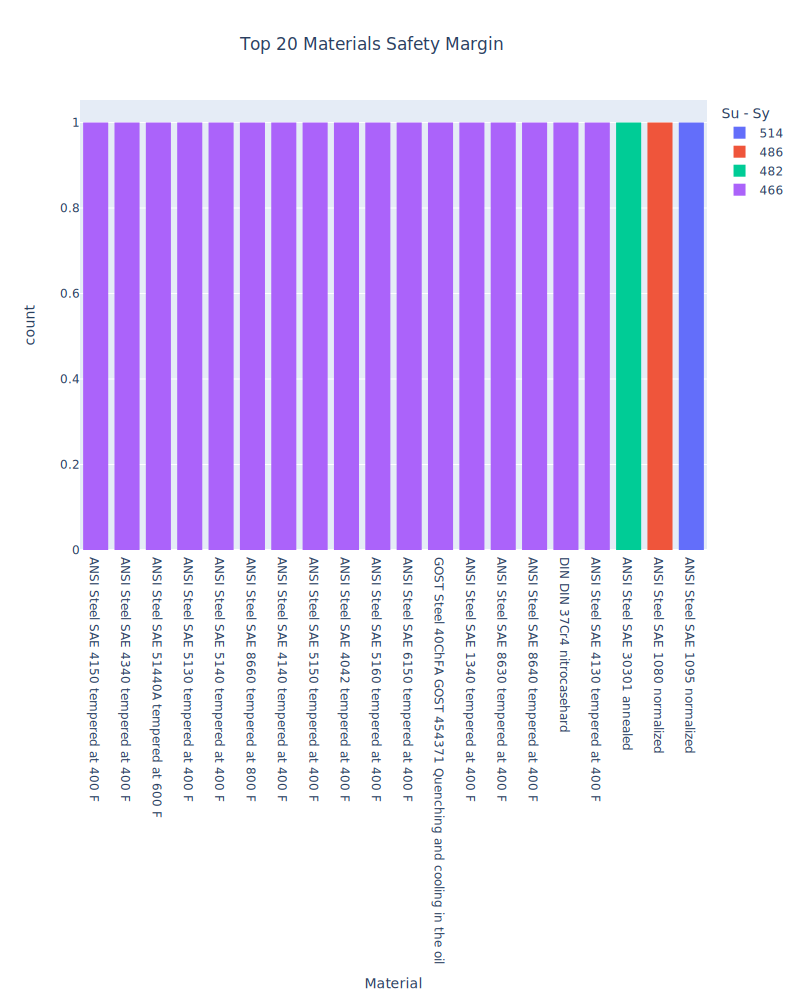

In [19]:
fig=px.histogram(top_20_materials,x='Material',color='Su - Sy',
                title= 'Top 20 Materials Safety Margin').update_xaxes(categoryorder='total descending')
fig.update_layout(
 autosize=False,
    width=800,
    height=1000,title_x=0.3 )

fig.show()

### Q7) Is there a relation between shear Modulus (G) and Poisson's Ratio (mu) by Materials ?

In [20]:
correlation = dataset.groupby('Material')[['G', 'mu']].corr().iloc[0::2, -1]
correlation

Material                              
ANSI Aluminum Alloy 1060H12 Wrought  G   NaN
ANSI Aluminum Alloy 1060H14 Wrought  G   NaN
ANSI Aluminum Alloy 1060H16 Wrought  G   NaN
ANSI Aluminum Alloy 1060H18 Wrought  G   NaN
ANSI Aluminum Alloy 1060O Wrought    G   NaN
                                          ..
NF NF 42CD4TS face hardened          G   NaN
NF NF 50CV4 heat treated             G   NaN
NF NF 51S7 heat treated              G   NaN
NF NF 55C3 heat treated              G   NaN
NF NF XC48H1 heat treated            G   NaN
Name: mu, Length: 756, dtype: float64

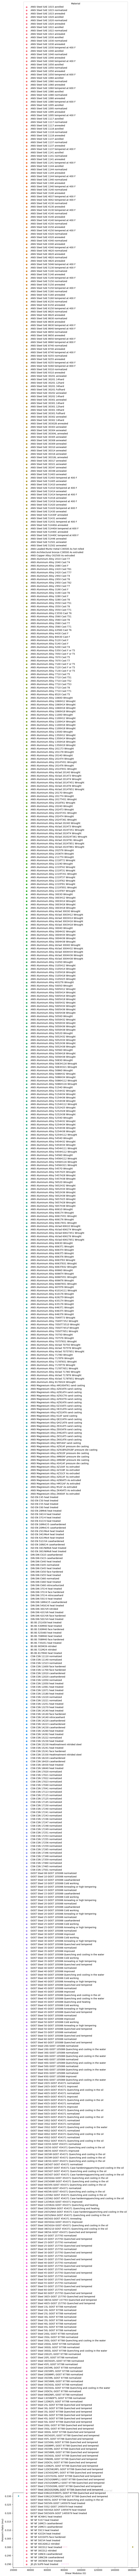

In [21]:
# Calculate the correlation between G and mu for each material group
correlation = dataset.groupby('Material')[['G', 'mu']].corr().iloc[0::2, -1]

# Reset the index to make 'Material' a regular column
correlation = correlation.reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='G', y='mu', hue='Material', data=dataset)
plt.title('Correlation Between G and Poisson\'s Ratio by Material')
plt.xlabel('Shear Modulus (G)')
plt.ylabel("Poisson's Ratio (mu)")
plt.legend(title='Material')
plt.show()